## Final Project Submission

Please fill out:
* Student name:  Olgah Omollo
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Maryanne Mwikali
* Blog post URL:


# Introduction

The goal of this project is to identify aircraft models with the lowest risk based on aviation accident data. 
By analyzing incidents, injuries, and fatalities, we aim to rank aircraft models by safety.
This insight is valuable for decision making in the new business endevour of operating airlines

## Data Loading

Importing python libraries required for data analysis and visualization

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dowloading of the CSV file

In [83]:
df=pd.read_csv("AviationData.csv", encoding="ISO-8859-1",low_memory=False)

# Reading the first 5 rows of data 

In [84]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Viewing information on the data to identify the colums with missing information

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Creating of relevant colums for data analysis

In [86]:
relevant_columns = [
    "Investigation.Type","Make", "Model","Number.of.Engines", "Injury.Severity",
    "Total.Fatal.Injuries", "Total.Serious.Injuries",
    "Total.Minor.Injuries", "Total.Uninjured"
]
df_clean =df[relevant_columns].copy()

### Data Cleaning

In [87]:
#Clean column names (remove extra spaces)
df_clean.columns = df_clean.columns.str.strip()

In [88]:
# Standardize 'Make' and 'Model' (lowercase everything)
df_clean['Make'] = df_clean['Make'].str.upper()
df_clean['Model'] = df_clean['Model'].str.upper()

Convert injury columns to numeric and fill missing with 0

In [89]:

injury_cols = [
    "Total.Fatal.Injuries", "Total.Serious.Injuries",
    "Total.Minor.Injuries", "Total.Uninjured"
]
df_clean[injury_cols] =df_clean[injury_cols].apply(pd.to_numeric, errors='coerce').fillna(0)



Cleaning the Injury colums by filling blank rows with Unavailble

In [90]:
df_clean['Injury.Severity'] = df_clean['Injury.Severity'].fillna('Unavailable')


Cleaning the number of Engine columns by removing the empty rows

In [91]:
df_clean = df_clean.dropna(subset=['Number.of.Engines'])

Cleaning the make column by removing empty rows

In [92]:
df_clean = df_clean.dropna(subset=['Make'])

Cleaning the Model colum by removing the emty rows

In [93]:
df_clean = df_clean.dropna(subset=['Model'])

Confirming the data after Cleaning

In [94]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82754 entries, 0 to 88886
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      82754 non-null  object 
 1   Make                    82754 non-null  object 
 2   Model                   82754 non-null  object 
 3   Number.of.Engines       82754 non-null  float64
 4   Injury.Severity         82754 non-null  object 
 5   Total.Fatal.Injuries    82754 non-null  float64
 6   Total.Serious.Injuries  82754 non-null  float64
 7   Total.Minor.Injuries    82754 non-null  float64
 8   Total.Uninjured         82754 non-null  float64
dtypes: float64(5), object(4)
memory usage: 6.3+ MB


# Data Analysis

### Create a risk score

In [95]:

# Calculate risk score (Fatal=10, Serious=5, Minor=2)
df_clean["RiskScore"] = (
    10 * df_clean["Total.Fatal.Injuries"] +
    5 * df_clean["Total.Serious.Injuries"] +
    2 * df_clean["Total.Minor.Injuries"]
)



In [96]:
df_clean.info()# Confirming the additional Riskscore column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82754 entries, 0 to 88886
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      82754 non-null  object 
 1   Make                    82754 non-null  object 
 2   Model                   82754 non-null  object 
 3   Number.of.Engines       82754 non-null  float64
 4   Injury.Severity         82754 non-null  object 
 5   Total.Fatal.Injuries    82754 non-null  float64
 6   Total.Serious.Injuries  82754 non-null  float64
 7   Total.Minor.Injuries    82754 non-null  float64
 8   Total.Uninjured         82754 non-null  float64
 9   RiskScore               82754 non-null  float64
dtypes: float64(6), object(4)
memory usage: 6.9+ MB


Downloading of the cleaned data

In [97]:
df_clean.to_csv('cleaned_data.csv', index=False)

### Analysis of investigations done per plane make and model

In [98]:
df_clean.groupby(["Make", "Model", "Investigation.Type"]).size().reset_index(name="Count").sort_values(by="Count", ascending=True)

,Make,Model,Investigation.Type,Count
0,107.5 FLYING CORPORATION,ONE DESIGN DR 107,Accident,1
10964,MATTISON,MAC MU-200,Accident,1
10965,MATTISON,MAC ULTRALIGHT,Accident,1
10966,MATTISON,STARDUSTER TOO,Accident,1
10967,MATTO,KR-2A MODIFIED,Accident,1
...,...,...,...,...
4403,CESSNA,150,Accident,798
13066,PIPER,PA-28-140,Accident,916
4518,CESSNA,172N,Accident,1142
4462,CESSNA,172,Accident,1662


### Cessna -152 had the highest number of accidents  tottaling to 2352,while 107.5 FLYING CORPORATION	ONE DESIGN DR 107	had 1 accident

### Count of Risk scores per number of Engines

In [99]:

df_clean.groupby(['Number.of.Engines'])['RiskScore'].count().reset_index()

,Number.of.Engines,RiskScore
0,0.0,1226
1,1.0,69538
2,2.0,11072
3,3.0,483
4,4.0,431
5,6.0,1
6,8.0,3


In [100]:
###Risk summary grouped by make and model of aircraft based on Investigation type and risk score
risk_summary = (
    df_clean
    .groupby(["Make", "Model"])
    .agg(
        Total_Incidents=("RiskScore", "count"),
        Total_Accidents=("RiskScore", "sum"), 
        Total_RiskScore=("RiskScore", "sum"),
        Avg_RiskScore=("RiskScore", "mean")
    )
    .reset_index()
    .sort_values(by="Avg_RiskScore")
)

In [101]:
risk_summary.head(10)

,Make,Model,Total_Incidents,Total_Accidents,Total_RiskScore,Avg_RiskScore
16938,ZWICKER MURRAY R,GLASTAR,1,0.0,0.0,0.0
7199,FLURRY,AVENTURA II,1,0.0,0.0,0.0
7197,FLUGZEUGBAU,EA-300L,1,0.0,0.0,0.0
7195,FLOYD R.HARRIS,EAGLE 2,1,0.0,0.0,0.0
7194,FLOYD JOSEPH B,RV6,1,0.0,0.0,0.0
14983,SONEX,WAIEX,1,0.0,0.0,0.0
7191,FLOURNOY MARTIN R,FLOURNOY MR S1S,1,0.0,0.0,0.0
7189,FLOHR DAVID J,R 80 TIGER MOTH,1,0.0,0.0,0.0
7186,FLIGHTWORKS CORP,CAPELLA XS FW2C80TD,1,0.0,0.0,0.0
7181,FLIGHTSTAR,FLIGHTSTAR II-SL,1,0.0,0.0,0.0


In [102]:
risk_summary['Model'].head().values.tolist()

['GLASTAR', 'AVENTURA II', 'EA-300L', 'EAGLE 2', 'RV6']

### Top 5 Models with Single reported incidents and Zero accidents are : Glastar, Aventura II , EA-300L. Eagle 2 and RV6

## Analysis of the lowest risk Aircraft Models

In [103]:

# Filter aircraft with 10+ incidents
lowest_risk_models = (
    risk_summary[risk_summary["Total_Accidents"] >= 1]  # Filter for rows with at least 1 accident
    .sort_values(by="Avg_RiskScore")  # Sort by Avg_RiskScore (ascending order by default)
    .head(10)  # Select top 10 rows
)


# Find the 10 models with the lowest average risk
#lowest_risk_models = risk_summary.sort_values('Avg_RiskScore').head(10)

print("Safest Aircraft Models:\n")
print(lowest_risk_models)


Safest Aircraft Models:

                     Make           Model  Total_Incidents  Total_Accidents  \
7950              GRUMMAN           G164B               21              4.0   
6571              EMBRAER          EMB145                8              2.0   
12244               PIPER      PA 18A 150                8              2.0   
4244               CESSNA            180C               16              4.0   
15691  THE BOEING COMPANY  BOEING 737-8AS                7              2.0   
4851               CESSNA           U-206                7              2.0   
2027                BEECH            BE23                6              2.0   
12859               PITTS             S1S                6              2.0   
4683               CESSNA            L-19                6              2.0   
2294                 BELL          206 B3                6              2.0   

       Total_RiskScore  Avg_RiskScore  
7950               4.0       0.190476  
6571               2.0   

## Data Visualization

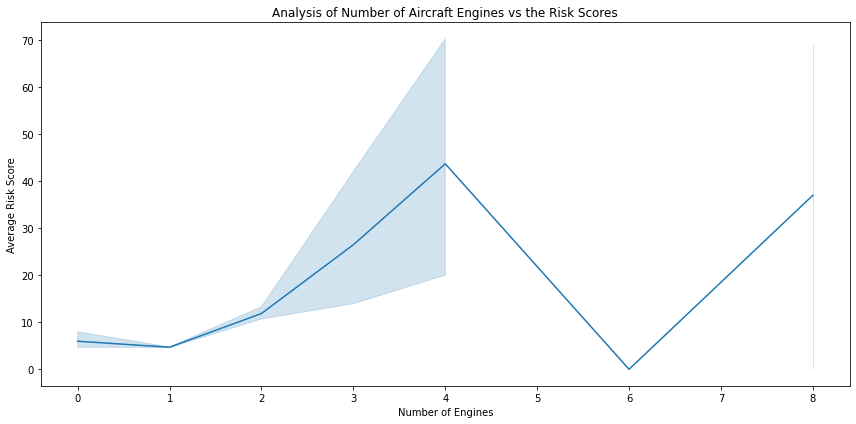

In [104]:
# Comparison of number of Engines and risk score
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="Number.of.Engines",  # x-axis: Number of Engines
    y="RiskScore",      # y-axis: Average Risk Score
    data=df_clean           # Data from the df_clean DataFrame
)
plt.title("Analysis of Number of Aircraft Engines vs the Risk Scores")
plt.xlabel("Number of Engines")
plt.ylabel("Average Risk Score")
plt.tight_layout()
plt.show()

### Airplanes with 6 engines have the lowest risk score  while those with 4 engines have the highest risk score

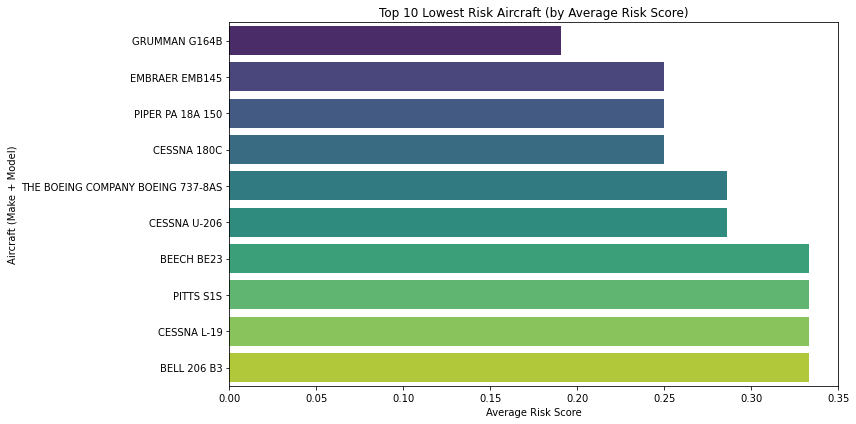

In [105]:

# Plot the safest aircraft models
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Avg_RiskScore",
    y=lowest_risk_models["Make"] + " " + lowest_risk_models["Model"],
    data=lowest_risk_models,
    palette="viridis"
)
plt.title("Top 10 Lowest Risk Aircraft (by Average Risk Score)")
plt.xlabel("Average Risk Score")
plt.ylabel("Aircraft (Make + Model)")
plt.tight_layout()
plt.show()


## Reccomendation:

## COnclusion